# Diamonds
by Anna Shen
Using dataset from Kaggle: https://www.kaggle.com/shivam2503/diamonds

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics

In [27]:
# import data
diamonds_df = pd.read_csv('diamonds.csv', header = None)

In [28]:
diamonds_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,carat,cut,color,clarity,depth,table,price,x,y,z
1,1.0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,2.0,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,3.0,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,4.0,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5,5.0,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
6,6.0,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
7,7.0,0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
8,8.0,0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
9,9.0,0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


## Data Cleaning

In [29]:
# dropping first column
diamonds_df = diamonds_df.drop([0], axis=1)

In [30]:
# naming column headers
diamonds_df.columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [31]:
# removing first row
diamonds_df = diamonds_df.drop([0])

In [32]:
diamonds_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61,338,4,4.05,2.39


In [33]:
# checking data types
diamonds_df.dtypes

carat      object
cut        object
color      object
clarity    object
depth      object
table      object
price      object
x          object
y          object
z          object
dtype: object

In [34]:
# setting data types for compatability with ggplot
diamonds_df['carat'] = diamonds_df['carat'].astype('float')
diamonds_df['cut'] = diamonds_df['cut'].astype('category')
diamonds_df['color'] = diamonds_df['color'].astype('category')
diamonds_df['clarity'] = diamonds_df['clarity'].astype('category')
diamonds_df['depth'] = diamonds_df['depth'].astype('float')
diamonds_df['table'] = diamonds_df['table'].astype('float')
diamonds_df['price'] = diamonds_df['price'].astype('float')
diamonds_df['x'] = diamonds_df['x'].astype('float')
diamonds_df['y'] = diamonds_df['y'].astype('float')
diamonds_df['z'] = diamonds_df['z'].astype('float')

In [35]:
# checking for null values
diamonds_df[diamonds_df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


## EDA

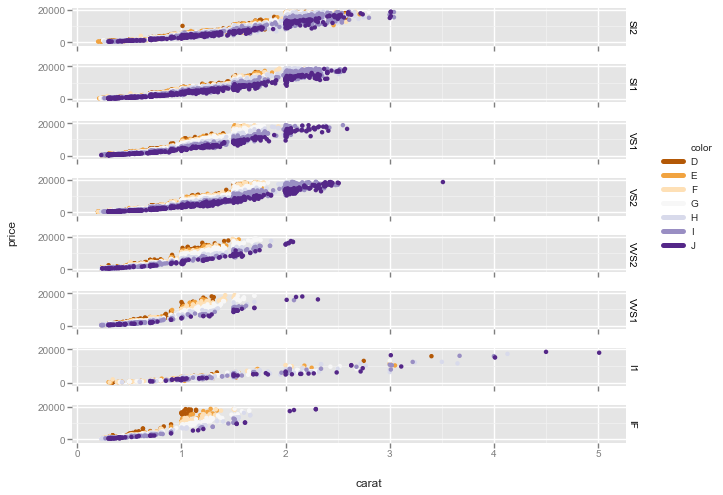

<ggplot: (-9223372036552424995)>

In [36]:
# using ggplot and facet_grid and adding some color
ggplot(diamonds_df, aes(x='carat', y='price', color='color')) +\
    geom_point() +\
    scale_color_brewer(type='diverging', palette=4)  +\
    facet_grid('clarity', scales='free_y')

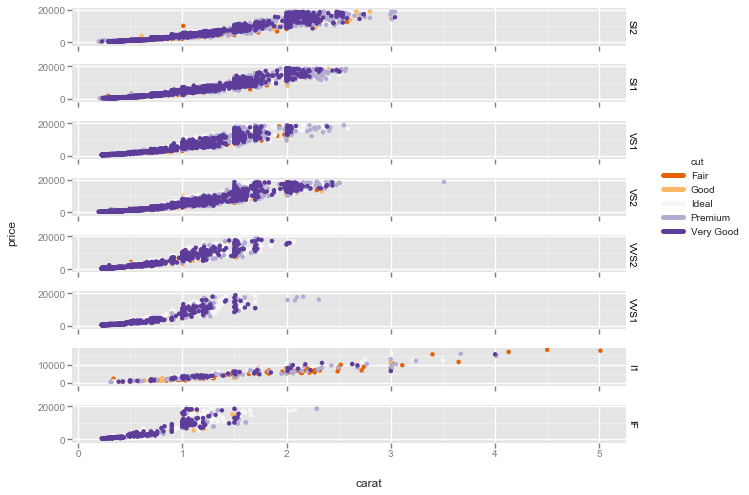

<ggplot: (300170879)>

In [37]:
ggplot(diamonds_df, aes(x='carat', y='price', color='cut')) +\
    geom_point() +\
    scale_color_brewer(type='diverging', palette=4)  +\
    facet_grid('clarity', scales='free_y')

### Observation
The above facet scatterplots show:
* Price and carat show a linear relationship
* Color is a strong indicator of price
* Higher clarity diamonds see a narrower spread (smaller variance) in price by carat
* More of the diamonds that were in the dataset were the higher clarity levels, with much less observations in VVS2 and lower categories of clarity

In [38]:
pd.crosstab(index=diamonds_df['cut'],columns="count")

col_0,count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


Basically it seems that there just aren't that many datapoints for 'good' or 'fair' diamonds. Hopefully this doesn't result in an overfit for perfect diamonds later in our model.

To prepare for the machine learning model, I will have to recode the categorical variables.

## Data Preparation
### Encoding Variables Using Label Encoding

In [39]:
# encoding cut as cut2
diamonds_df['cut2'] = diamonds_df.cut.map({'Fair': 1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5})
# encoding color as color2
diamonds_df['color2'] = diamonds_df.color.map({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D':7})
# encoding clarity as clarity2
diamonds_df['clarity2'] = diamonds_df.clarity.map({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 
                                                   'VVS2': 6, 'VVS1': 7, 'IF': 8})

In [40]:
diamonds_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut2,color2,clarity2
1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,5,6,2
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,4,6,3
3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,2,6,5
4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,4,2,4
5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,2,1,2
6,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48,3,1,6
7,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47,3,2,7
8,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53,3,3,3
9,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49,1,6,4
10,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39,3,3,5


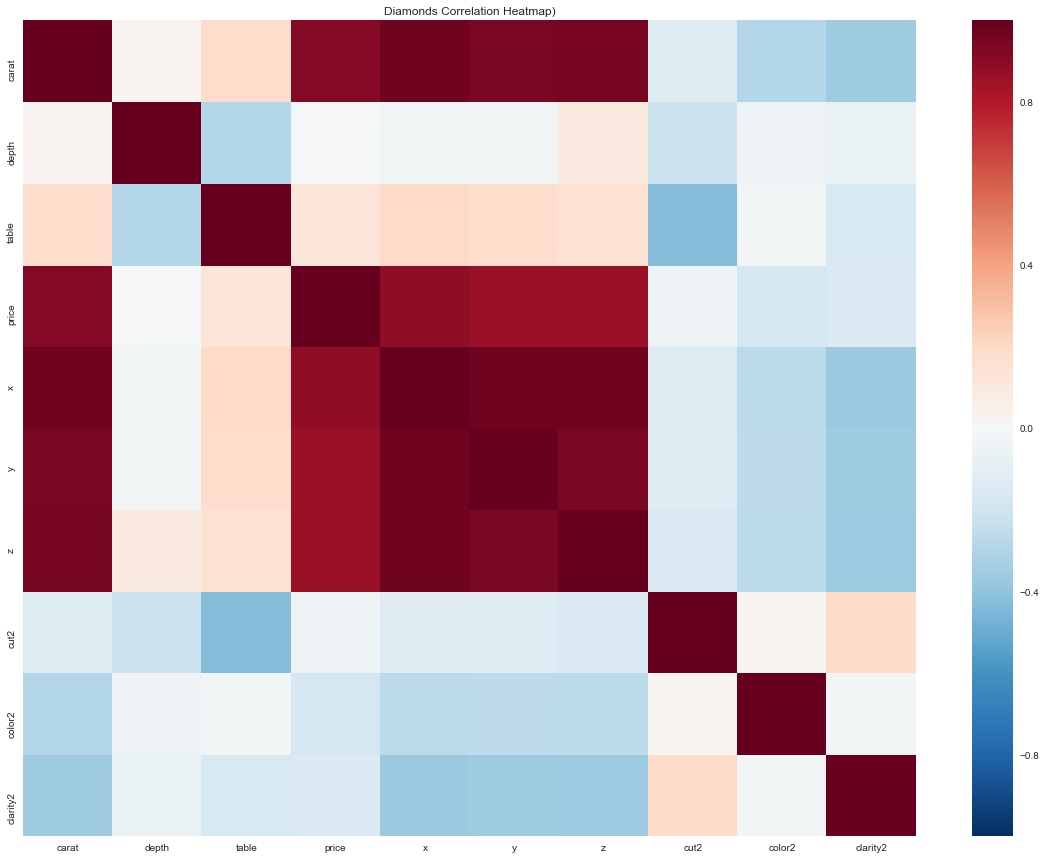

In [41]:
# creating heatmap using seaborn
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Diamonds Correlation Heatmap)")
corr = diamonds_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Observation
Price seems to be correlated positively with carat, x, y, and z. Surprisingly, my recoded clarity, color, and cut don't seem to be strong indicators for price. I'll discard cut but keep clarity and color based off of what I saw in my EDA facet grids.

## Machine Learning

In [42]:
# rounding price to nearest $20 to reduce # of diamonds with just 1 price value
# diamonds_df['price2'] = diamonds_df['price'] - (diamonds_df['price'] % 20)

In [43]:
# creating test train split
X=diamonds_df[['carat','x','y','z','clarity2','color2']]
y=diamonds_df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LogisticRegression(C=1, random_state=0)
diamond_model = model.fit(X_train, y_train)

In [ ]:
predict_train = diamond_model.predict(X_train)
predict_test = diamond_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test))